In [77]:
import itertools
import pandas as pd
import numpy as np

from aeon.datasets.tsc_datasets import multivariate

In [119]:
df = pd.read_csv("./results/results_final.csv")
df_properties = pd.read_csv("./metadata/datasets_properties.csv")

In [78]:
reps = ['RP', 'MTF', 'GASF', 'GADF', 'FIRTS', 'CWT']
operations = ["sum", "subtraction", "dot_product", "element_wise"]
convolution_algorithm = [np.nan, "MiniRocket", "Rocket"]

# Resultados

In [129]:
df

,dataset,representation,operation,accuracy,convolution_algorithm,classification_algorithm
0,ArticularyWordRecognition,NaN,NaN,0.520000,NaN,Ridge
1,AtrialFibrillation,NaN,NaN,0.400000,NaN,Ridge
2,BasicMotions,NaN,NaN,0.575000,NaN,Ridge
3,Cricket,NaN,NaN,0.500000,NaN,Ridge
4,DuckDuckGeese,NaN,NaN,0.120000,NaN,Ridge
...,...,...,...,...,...,...
1246,SelfRegulationSCP1,MTF,element_wise,0.563140,MiniRocket,Ridge
1247,SelfRegulationSCP1,GASF,sum,0.682594,NaN,Ridge
1248,SelfRegulationSCP1,GASF,sum,0.627986,Rocket,Ridge
1249,SelfRegulationSCP1,GASF,sum,0.641638,MiniRocket,Ridge


## Resultados faltantes

In [128]:
permutations = list(
    itertools.product(
        multivariate,
        reps,
        operations,
        convolution_algorithm
    )
)

df_permutation = pd.DataFrame(
    permutations,
    columns=["dataset", "representation", "operation", "convolution_algorithm"]
)

df_diff = df_permutation.merge(
    df[["dataset", "representation", "operation", "convolution_algorithm"]], 
    how='outer', 
    indicator=True
).query('_merge == "left_only"').drop('_merge', axis=1)

df_diff

,dataset,representation,operation,convolution_algorithm
219,CharacterTrajectories,CWT,dot_product,MiniRocket
220,CharacterTrajectories,CWT,dot_product,Rocket
221,CharacterTrajectories,CWT,dot_product,NaN
222,CharacterTrajectories,CWT,element_wise,MiniRocket
223,CharacterTrajectories,CWT,element_wise,Rocket
...,...,...,...,...
2180,UWaveGestureLibrary,RP,subtraction,Rocket
2181,UWaveGestureLibrary,RP,subtraction,NaN
2182,UWaveGestureLibrary,RP,sum,MiniRocket
2183,UWaveGestureLibrary,RP,sum,Rocket


# Datasets com resultados faltantes

In [123]:
datasets_missing_results = df_diff["dataset"].unique() 
df_properties[df_properties["dataset"].isin(datasets_missing_results)]

,dataset,train_cases,test_cases,dimensions,length,classes
3,CharacterTrajectories,1422,1436,3,182,20
5,DuckDuckGeese,60,40,1345,270,5
6,EigenWorms,128,131,6,17984,5
14,Heartbeat,204,205,61,405,2
15,JapaneseVowels,270,370,12,29,9
17,LSST,2459,2466,6,36,14
18,InsectWingbeat,30000,20000,200,78,10
19,MotorImagery,278,100,64,3000,2
22,PEMS-SF,267,173,963,144,7
25,SelfRegulationSCP1,268,293,6,896,2


# Datasets sem nenhum resultado

In [124]:
not_calculated_datasets = [
    dataset
    for dataset in multivariate
    if dataset not in df["dataset"].unique()
]
df_properties[df_properties["dataset"].isin(not_calculated_datasets)]

,dataset,train_cases,test_cases,dimensions,length,classes
3,CharacterTrajectories,1422,1436,3,182,20
15,JapaneseVowels,270,370,12,29,9
18,InsectWingbeat,30000,20000,200,78,10
27,SpokenArabicDigits,6599,2199,13,93,10


# Resultados faltantes dos datasets que conseguiram carregar 

In [130]:
missing_results_in_fine_datasets = df[
    (df["dataset"].isin(datasets_missing_results))
    & ~(df["dataset"].isin(not_calculated_datasets))
]
missing_results_in_fine_datasets

,dataset,representation,operation,accuracy,convolution_algorithm,classification_algorithm
4,DuckDuckGeese,NaN,NaN,0.120000,NaN,Ridge
5,EigenWorms,NaN,NaN,0.435115,NaN,Ridge
13,Heartbeat,NaN,NaN,0.658537,NaN,Ridge
15,LSST,NaN,NaN,0.323195,NaN,Ridge
16,MotorImagery,NaN,NaN,0.560000,NaN,Ridge
...,...,...,...,...,...,...
1246,SelfRegulationSCP1,MTF,element_wise,0.563140,MiniRocket,Ridge
1247,SelfRegulationSCP1,GASF,sum,0.682594,NaN,Ridge
1248,SelfRegulationSCP1,GASF,sum,0.627986,Rocket,Ridge
1249,SelfRegulationSCP1,GASF,sum,0.641638,MiniRocket,Ridge


<Axes: xlabel='representation'>

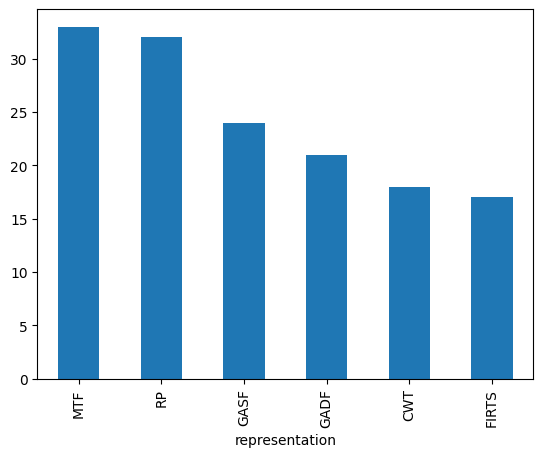

In [143]:
per_representation = missing_results_in_fine_datasets["representation"].value_counts()
per_representation.plot(kind="bar")

<Axes: xlabel='operation'>

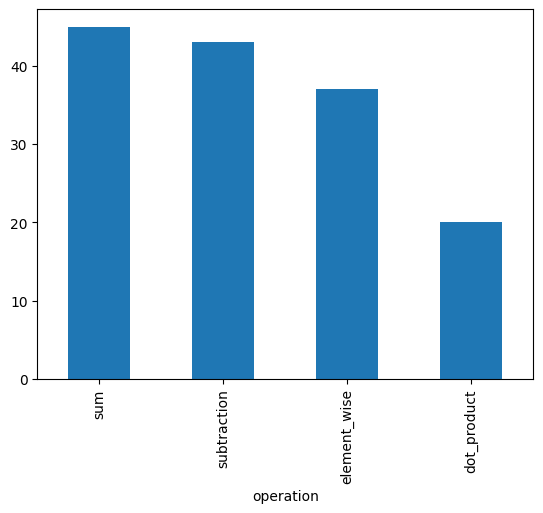

In [141]:
per_operation = missing_results_in_fine_datasets["operation"].value_counts()
per_operation.plot(kind="bar")

<Axes: xlabel='convolution_algorithm'>

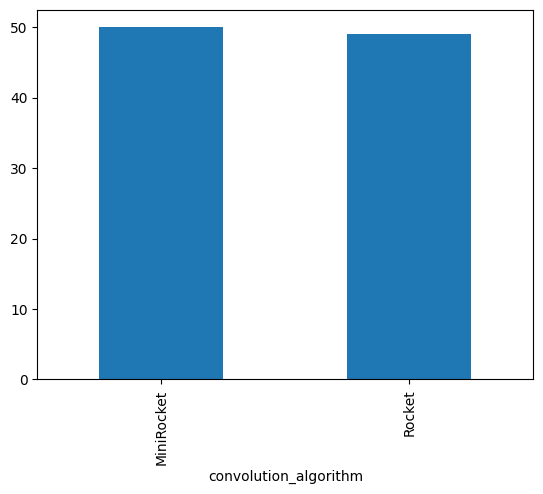

In [142]:
per_concolution_algorithm = missing_results_in_fine_datasets["convolution_algorithm"].value_counts()
per_concolution_algorithm.plot(kind="bar")